In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import Counter

import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
file_path = '/content/drive/MyDrive/CreditCard/creditcard.csv'
fraud_df = pd.read_csv(file_path)
fraud_df.shape

(284807, 31)

In [34]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
df = fraud_df.copy()

Text(0.5, 1.0, 'V28 Distribution')

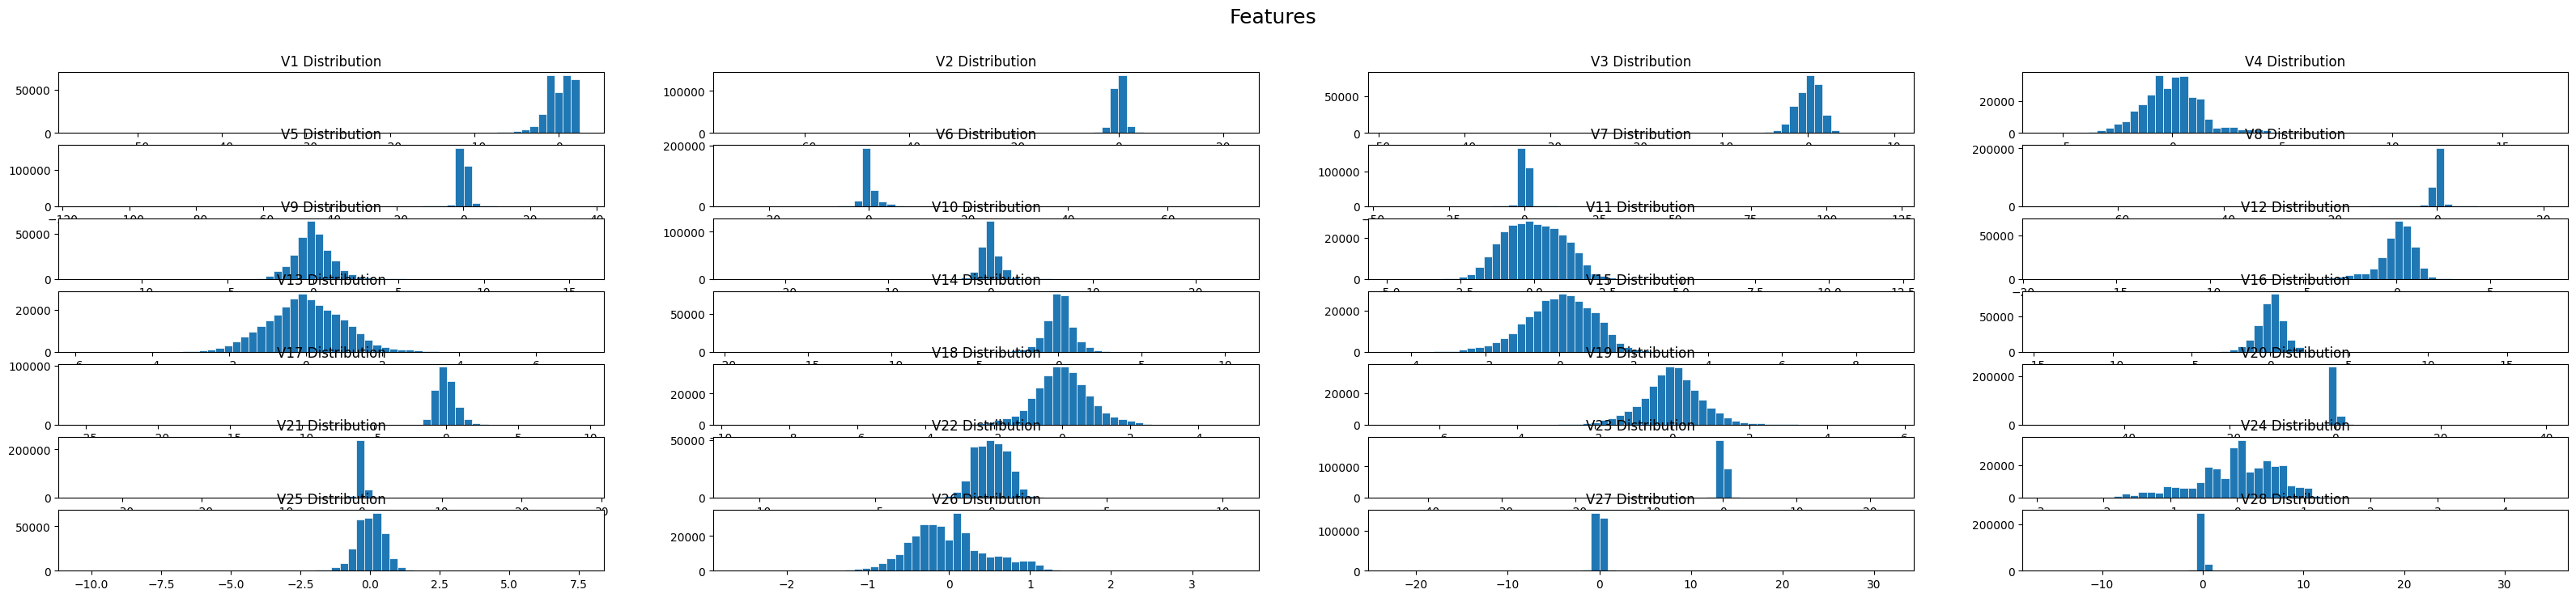

In [36]:
fig, axex = plt.subplots(nrows = 7, ncols = 4, figsize = (40,8))
fig.suptitle('Features\n', size = 18)

axex[0,0].hist(df['V1'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[0,0].set_title("V1 Distribution")

axex[0,1].hist(df['V2'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[0,1].set_title("V2 Distribution")

axex[0,2].hist(df['V3'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[0,2].set_title("V3 Distribution")

axex[0,3].hist(df['V4'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[0,3].set_title("V4 Distribution")

axex[1,0].hist(df['V5'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[1,0].set_title("V5 Distribution")

axex[1,1].hist(df['V6'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[1,1].set_title("V6 Distribution")

axex[1,2].hist(df['V7'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[1,2].set_title("V7 Distribution")

axex[1,3].hist(df['V8'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[1,3].set_title("V8 Distribution")

axex[2,0].hist(df['V9'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[2,0].set_title("V9 Distribution")

axex[2,1].hist(df['V10'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[2,1].set_title("V10 Distribution")

axex[2,2].hist(df['V11'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[2,2].set_title("V11 Distribution")

axex[2,3].hist(df['V12'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[2,3].set_title("V12 Distribution")

axex[3,0].hist(df['V13'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[3,0].set_title("V13 Distribution")

axex[3,1].hist(df['V14'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[3,1].set_title("V14 Distribution")

axex[3,2].hist(df['V15'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[3,2].set_title("V15 Distribution")

axex[3,3].hist(df['V16'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[3,3].set_title("V16 Distribution")

axex[4,0].hist(df['V17'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[4,0].set_title("V17 Distribution")

axex[4,1].hist(df['V18'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[4,1].set_title("V18 Distribution")

axex[4,2].hist(df['V19'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[4,2].set_title("V19 Distribution")

axex[4,3].hist(df['V20'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[4,3].set_title("V20 Distribution")

axex[5,0].hist(df['V21'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[5,0].set_title("V21 Distribution")

axex[5,1].hist(df['V22'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[5,1].set_title("V22 Distribution")

axex[5,2].hist(df['V23'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[5,2].set_title("V23 Distribution")

axex[5,3].hist(df['V24'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[5,3].set_title("V24 Distribution")

axex[6,0].hist(df['V25'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[6,0].set_title("V25 Distribution")

axex[6,1].hist(df['V26'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[6,1].set_title("V26 Distribution")

axex[6,2].hist(df['V27'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[6,2].set_title("V27 Distribution")

axex[6,3].hist(df['V28'], bins = 60, linewidth = 0.5, edgecolor = 'white')
axex[6,3].set_title("V28 Distribution")

In [43]:
def IQR_method (df,n,features):

  outlier_list = []

  for column in features:

    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)

    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR

    outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    outlier_list.extend(outlier_list_column)

  outlier_list = Counter(outlier_list)
  multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

  df1 = df[df[column] < Q1 - outlier_step]
  df2 = df[df[column] > Q3 + outlier_step]

  print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

  return multiple_outliers


feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Outliers_IQR = IQR_method(df,1,feature_list)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)


Total number of outliers is: 31904


In [44]:
df_out.shape

(203377, 31)

### Model Design

In [46]:
X = df_out.drop('Class', axis = 1)
y = df_out['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

Random Forest Classifier

In [47]:
clf = RandomForestClassifier(n_jobs = 5, random_state = 42, n_estimators = 100, verbose = False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


<Figure size 1000x500 with 0 Axes>

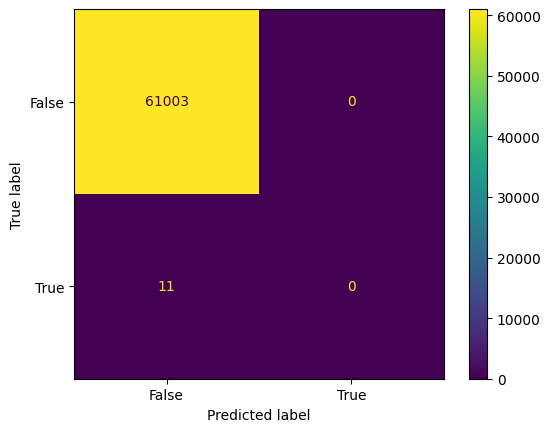

In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()

XGB

In [49]:
xgb_model = xgb.XGBClassifier( objective ='binary:logistic', max_depth = 3,  learning_rate = 0.01,   n_estimators = 100 )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

<Figure size 1000x500 with 0 Axes>

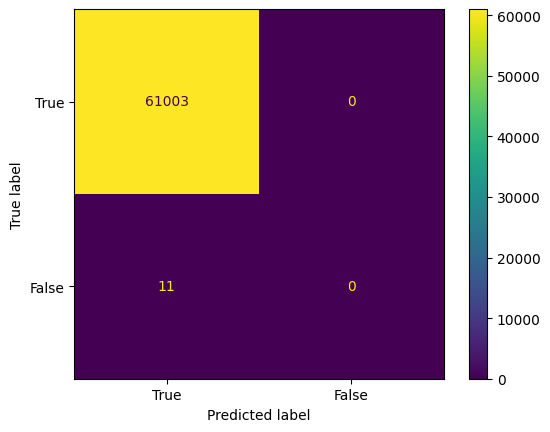

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix( y_test , y_pred )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

Our model may be overfitting

### Changing our approcah due to overfitting

In [53]:
train_df, test_df = train_test_split(fraud_df, test_size=0.2, random_state=42, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.3, random_state=42, shuffle=True )
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [54]:
clf = RandomForestClassifier(n_jobs=5,
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])

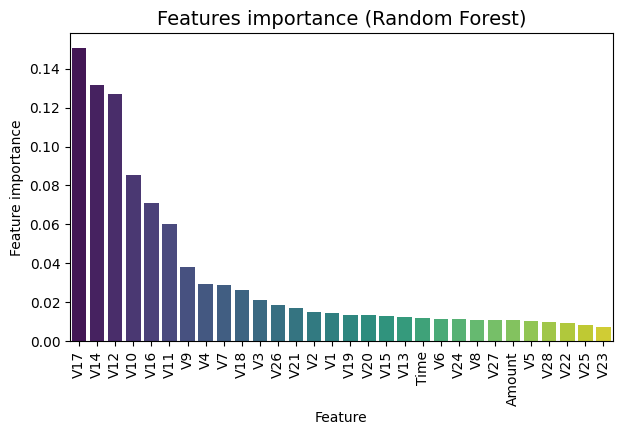

In [60]:
#Feature Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance (Random Forest)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,palette = 'viridis')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

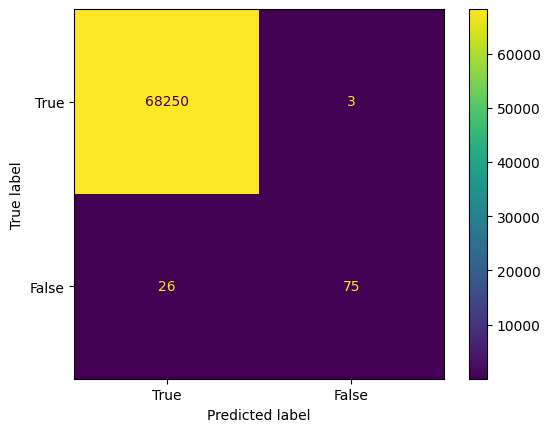

In [56]:
conf_mat = confusion_matrix(valid_df[target], preds )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(valid_df[target] , preds)
precision = precision_score(valid_df[target] , preds)
recall = recall_score(valid_df[target] , preds)
f1 = f1_score(valid_df[target] , preds)

new_row = {'model':'RF','accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)

{'model': 'RF', 'accuracy': 0.9995757380694619, 'precision': 0.9615384615384616, 'recall': 0.7425742574257426, 'f1': 0.8379888268156426}


<Figure size 1000x500 with 0 Axes>

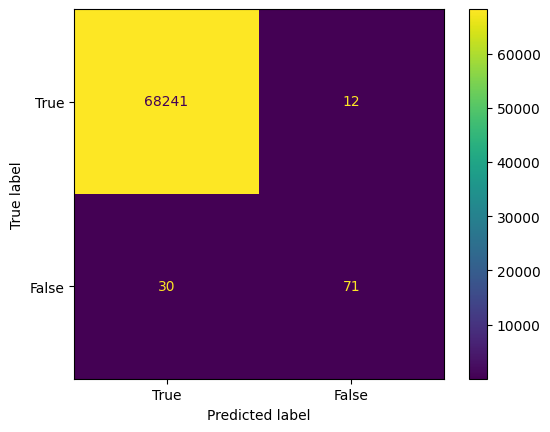

In [58]:
xgb_model = xgb.XGBClassifier( objective ='binary:logistic', max_depth = 3,  learning_rate = 0.01,   n_estimators = 100 )
xgb_model.fit(train_df[predictors], train_df[target].values)
y_pred = xgb_model.predict(valid_df[predictors])

conf_mat = confusion_matrix( valid_df[target] , y_pred )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

In [59]:
accuracy = accuracy_score(valid_df[target] , y_pred)
precision = precision_score(valid_df[target] , y_pred)
recall = recall_score(valid_df[target] , y_pred)
f1 = f1_score(valid_df[target] , y_pred)

new_row = {'model':'XGB','accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)

{'model': 'XGB', 'accuracy': 0.9993855516868069, 'precision': 0.8554216867469879, 'recall': 0.7029702970297029, 'f1': 0.7717391304347826}


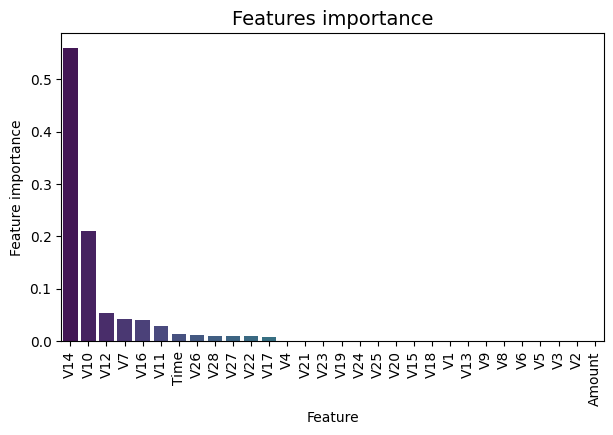

In [63]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': xgb_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,palette = 'viridis')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### V14, V10, V12, V17, V7, V11 these features seem to be extremely important in all the models.